In [1]:
%pip install numpy
%pip install matplotlib
%pip install opencv-python

import IPython.display as ipyd
ipyd.clear_output()

import cv2
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Преобразование
Делаем преобразование фурье над ЧБ версией изображения

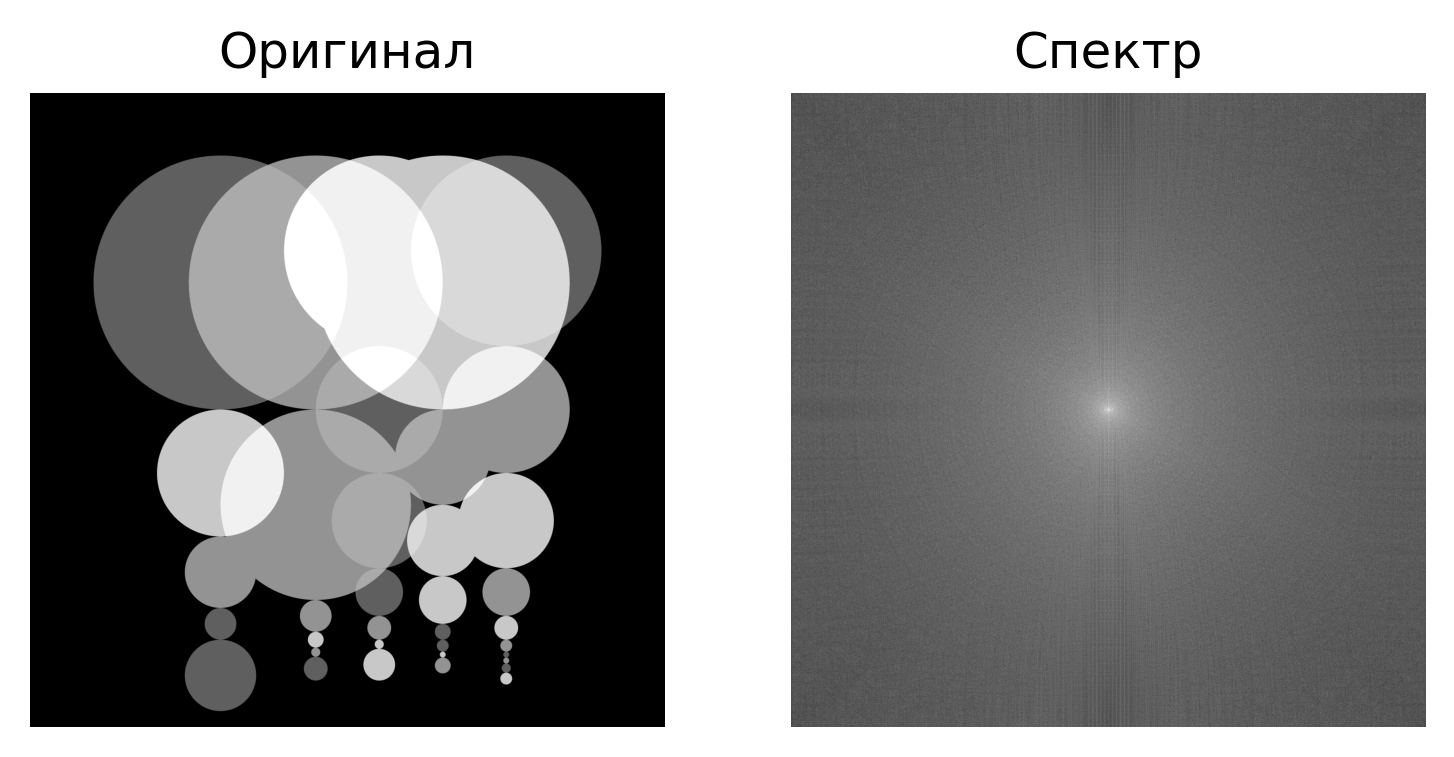

In [2]:
img = cv2.imread("source.png", cv2.IMREAD_GRAYSCALE)
fftshift = np.fft.fftshift(np.fft.fft2(img))

plt.figure(dpi=300)

plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("Оригинал")
plt.axis("off")

plt.subplot(122)
plt.imshow(np.log(np.abs(fftshift)), cmap="gray")
plt.title("Спектр")
plt.axis("off")

plt.show()

# Удаление основных частот
Нам нужны контуры, посему удаляем (зануляем) основные частоты (центр)

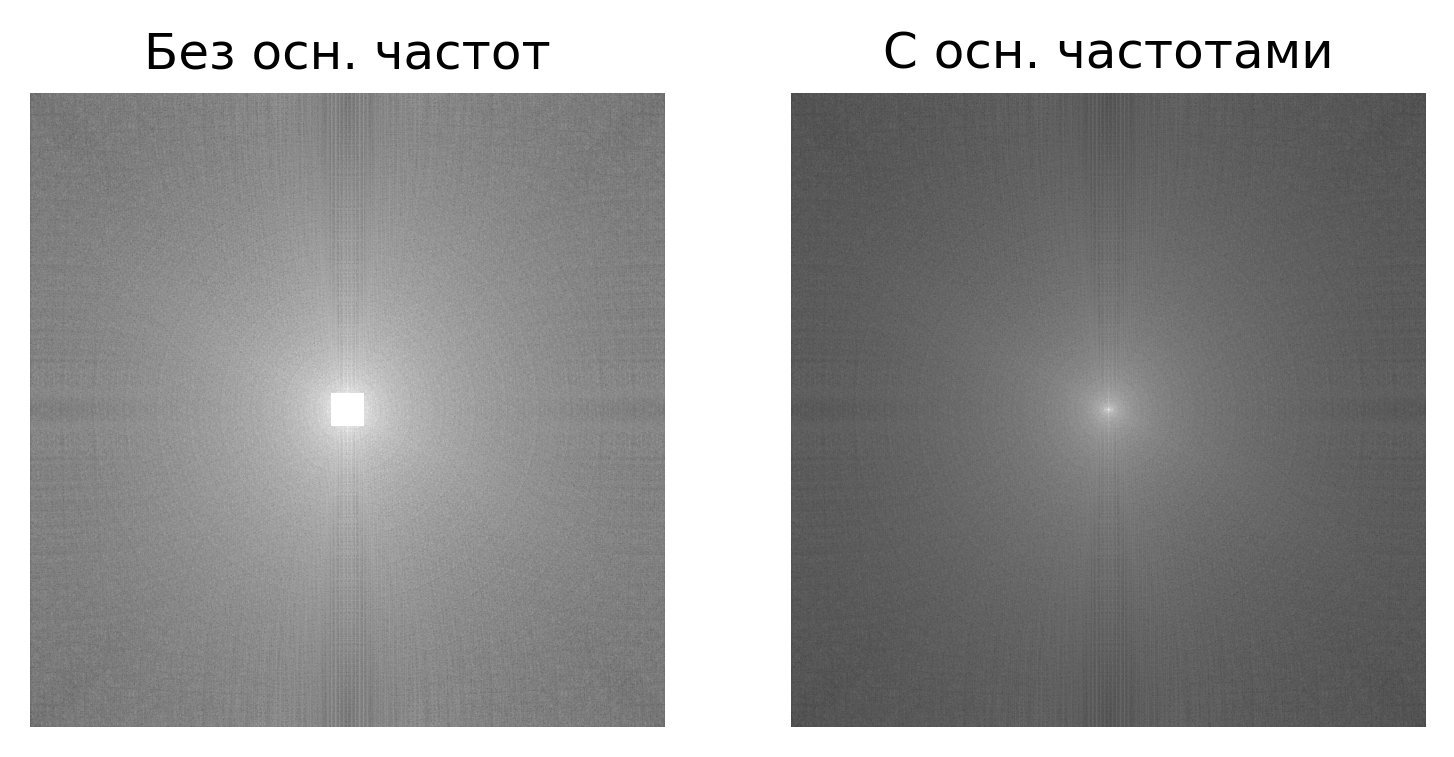

In [3]:
x, y = img.shape
center_x, center_y = x // 2 , y // 2
margin = 40
fftshift_wo_main = fftshift.copy()
fftshift_wo_main[center_x - margin : center_x + margin,
                 center_y - margin : center_y + margin] = 0

plt.figure(dpi=300)
plt.subplot(121)
plt.imshow(np.log(np.abs(fftshift_wo_main)), cmap="gray")
plt.title("Без осн. частот")
plt.axis("off")

plt.subplot(122)
plt.imshow(np.log(np.abs(fftshift)), cmap="gray")
plt.title("С осн. частотами")
plt.axis("off")

plt.show()

# еинавозарбоерП
Получаем контур через обратное преобразование

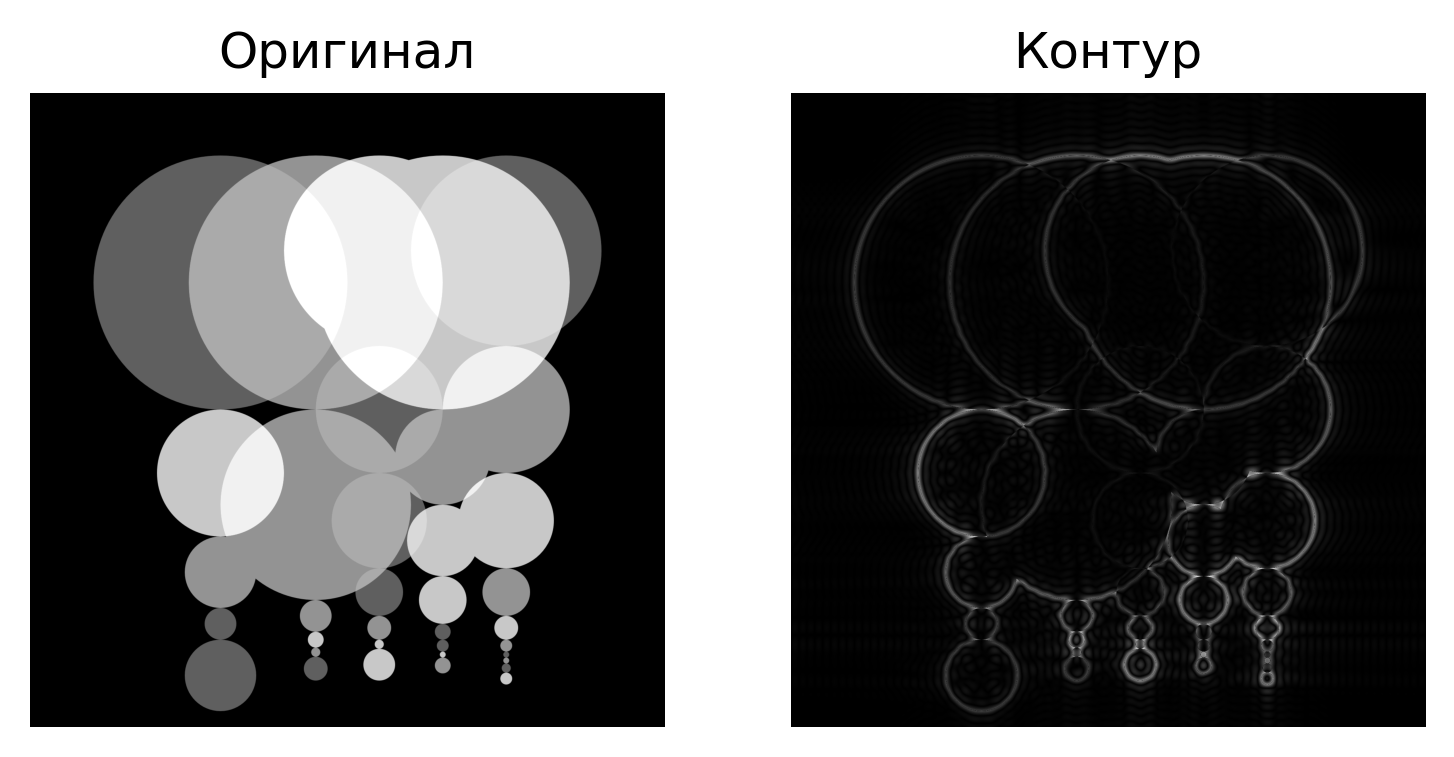

In [4]:
ifftshift = np.fft.ifftshift(fftshift_wo_main)
img_ifftshift = np.abs(np.fft.ifft2(ifftshift))

plt.figure(dpi=300)

plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("Оригинал")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_ifftshift, cmap="gray")
plt.title("Контур")
plt.axis("off")

plt.show()